In [12]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread, imwrite
import cv2

In [2]:
def plot_image(img):
    plt.imshow(img, cmap = 'gray', vmin=0, vmax=255)
    plt.title(''), plt.xticks([]), plt.yticks([])

def plot_image_and_hist(img):
    plt.subplot(121)
    plt.imshow(img, cmap = 'gray', vmin=0, vmax=255)
    plt.title(''), plt.xticks([]), plt.yticks([])

    plt.subplot(122)
    plt.hist(img.ravel(),256,[0,256]); plt.show()
    
def plot_hist_and_cum(img):
    hist = np.histogram(img, bins=np.arange(256))
    fig, ax1 = plt.subplots()
    #ax1.fill_between(hist[1][1:], 0, hist[0])
    ax1.bar(hist[1][1:], hist[0])
    ax2 = ax1.twinx()
    ax2.plot(hist[1][1:], np.cumsum(hist[0]), color='red')

def linearTrans(img, alpha, beta, dmin=0, dmax=255):
    return np.uint8(np.clip(alpha*img + beta, dmin, dmax-1))

def linearGradient(img, dmin=0, dmax=255):
    pattern = np.transpose(np.array([np.arange(img.shape[0])]).repeat(img.shape[1],0)/img.shape[0])
    pattern = np.flip(pattern)
    return np.uint8(np.clip(pattern*img, dmin, dmax-1))

def blend(img1, img2, alpha, dmin=0, dmax=255):
    return np.uint8(np.clip((1.0-alpha)*img1 + alpha*img2, dmin, dmax-1))

def linearBlend(img1, img2, dmin=0, dmax=255):
    pattern = np.array([np.arange(img1.shape[1])]).repeat(img1.shape[0],0)/img1.shape[1]
    return np.uint8(np.clip((-pattern+1)*img1 + pattern*img2, dmin, dmax-1))

def gammaCorrection(img, gamma, dmin=0, dmax=255):
    return np.uint8(np.clip(((img/dmax)**(1.0/gamma))*dmax, dmin, dmax-1))

def negative(img, dmin=0, dmax=255):
    return np.uint8(np.clip(-img+dmax, dmin, dmax-1))

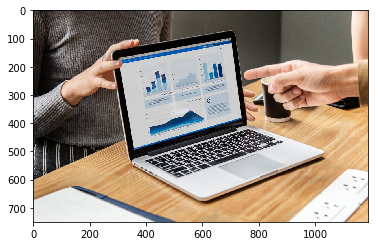

In [3]:
img = imread('images/00_photo1.jpeg')
plt.imshow(img)

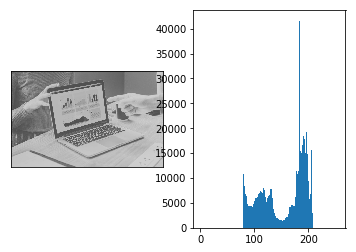

In [4]:
img[:,:,0] = np.clip(0.5*img[:,:,0]+80, 0.0, 255.0).astype(np.uint8)
plot_image_and_hist(img[:,:,0])

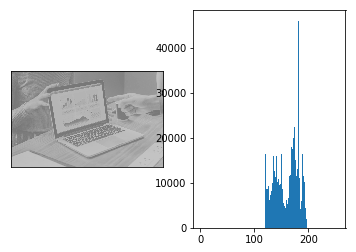

In [5]:
img[:,:,1] = np.clip(0.3*img[:,:,1]+120, 0.0, 255.0).astype(np.uint8)
plot_image_and_hist(img[:,:,1])

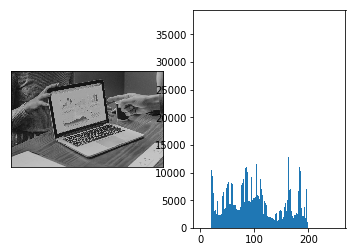

In [6]:
img[:,:,2] = np.clip(0.7*img[:,:,2]+20, 0.0, 255.0).astype(np.uint8)
plot_image_and_hist(img[:,:,2])

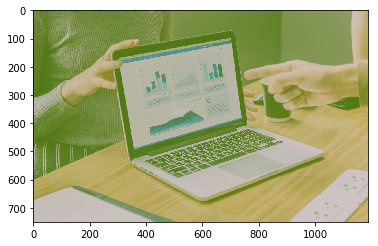

In [7]:
plt.imshow(img)

In [8]:
img.shape

(750, 1187, 3)

In [9]:
noise = np.random.rand(img.shape[0], img.shape[1])>0.995
noise1 = np.array([noise, noise, noise])
noise2 = np.swapaxes(noise1,0,2)
noise3 = np.swapaxes(noise2,0,1)
img[noise3] = 0

In [10]:
noise = np.random.rand(img.shape[0], img.shape[1])>0.995
noise1 = np.array([noise, noise, noise])
noise2 = np.swapaxes(noise1,0,2)
noise3 = np.swapaxes(noise2,0,1)
img[noise3] = 255

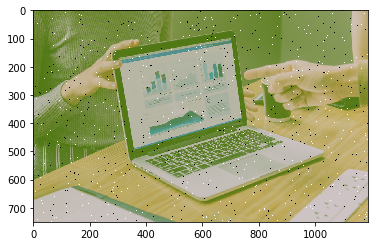

In [11]:
plt.imshow(img)

In [13]:
imwrite('images/00_photo2.jpeg', img)

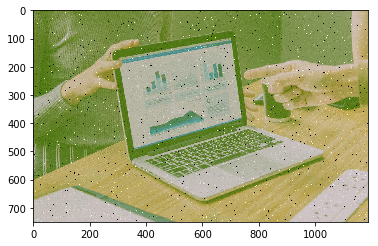

In [14]:
img = imread('images/00_photo2.jpeg')
plt.imshow(img)

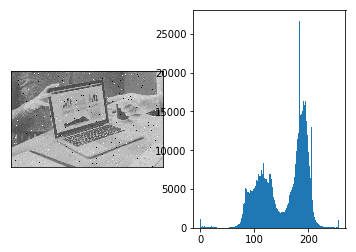

In [15]:
plot_image_and_hist(img[:,:,0])

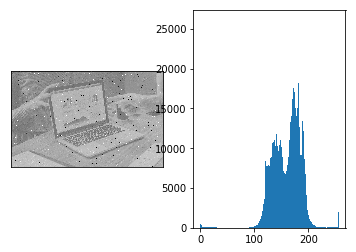

In [16]:
plot_image_and_hist(img[:,:,1])

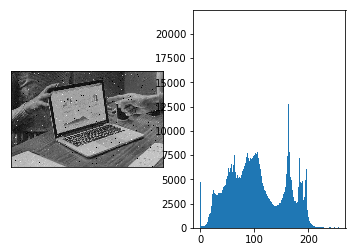

In [17]:
plot_image_and_hist(img[:,:,2])